In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data0 = pd.read_csv('clickbait_new_data.csv')
#Checking the shape of the dataset
data0 = data0.drop(['postMedia'], axis = 1).copy()
data0 = data0.drop(['postText'], axis = 1).copy()
data0 = data0.drop(['id'], axis = 1).copy()
data0 = data0.drop(['targetCaptions'], axis = 1).copy()
data0 = data0.drop(['targetParagraphs'], axis = 1).copy()
data0 = data0.drop(['targetTitle'], axis = 1).copy()
data0 = data0.drop(['postTimestamp'], axis = 1).copy()
data0 = data0.drop(['targetKeywords'], axis = 1).copy()
data0 = data0.drop(['targetDescription'], axis = 1).copy()
data0 = data0.drop(['Unnamed: 0'], axis = 1).copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data0['truthClass'] = le.fit_transform(data0['truthClass'])
data = data0
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
# Sepratating & assigning features and target columns to X & y
y = data['truthClass']
X = data.drop(['truthClass'],axis=1)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

fs = SelectKBest(score_func=f_classif, k=200)
X = fs.fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
#importing packages
from sklearn.metrics import accuracy_score

In [5]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [6]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [7]:
y_pred_tree=tree.predict(X)

In [8]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.837
Decision Tree: Accuracy on test Data: 0.797


In [9]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [10]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [11]:
y_pred_forest = forest.predict(X)

In [12]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.837
Random forest: Accuracy on test Data: 0.809


### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [13]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [14]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [15]:
y_pred_mlp = mlp.predict(X)

In [16]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.991
Multilayer Perceptrons: Accuracy on test Data: 0.804


### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [17]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [19]:
y_pred_xgb = xgb.predict(X)

In [20]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.996
XGBoost : Accuracy on test Data: 0.821


In [21]:
#XGBoost Classification model
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model
ada = AdaBoostClassifier(learning_rate=0.4,random_state=7)
#fit the model
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.4, random_state=7)

In [22]:
#predicting the target value from the model for the samples
y_test_ada = ada.predict(X_test)
y_train_ada = ada.predict(X_train)

In [23]:
y_pred_ada = ada.predict(X)

In [24]:
#computing the accuracy of the model performance
acc_train_ada = accuracy_score(y_train,y_train_ada)
acc_test_ada = accuracy_score(y_test,y_test_ada)

print("AdaBoost: Accuracy on training Data: {:.3f}".format(acc_train_ada))
print("AdaBoost : Accuracy on test Data: {:.3f}".format(acc_test_ada))

AdaBoost: Accuracy on training Data: 0.840
AdaBoost : Accuracy on test Data: 0.824


In [25]:
#XGBoost Classification model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gb = GradientBoostingClassifier(learning_rate=0.4,max_depth=7)
#fit the model
gb.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_gb = gb.predict(X_test)
y_train_gb = gb.predict(X_train)

#computing the accuracy of the model performance
acc_train_gb = accuracy_score(y_train,y_train_gb)
acc_test_gb = accuracy_score(y_test,y_test_gb)

print("Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_gb))
print("Gradient Boost : Accuracy on test Data: {:.3f}".format(acc_test_gb))

Gradient Boost: Accuracy on training Data: 0.996
Gradient Boost : Accuracy on test Data: 0.823


In [26]:
y_pred_gb = gb.predict(X)

In [27]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(multi_class="multinomial", solver="newton-cg")
lor.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_lor = lor.predict(X_test)
y_train_lor = lor.predict(X_train)
acc_train_lor = accuracy_score(y_train,y_train_lor)
acc_test_lor = accuracy_score(y_test,y_test_lor)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_lor))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_lor))

Logistic Regression: Accuracy on training Data: 0.861
Logistic Regression : Accuracy on test Data: 0.838


In [28]:
y_pred_lor = lor.predict(X)

In [29]:
X_train.shape

(8244, 200)

In [30]:
from statistics import mode
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#majority voting

y_test_maj = []
for i in range(y_test_xgb.size):
    y_maj=[]
    y_maj.append(y_test_xgb[i])
    y_maj.append(y_test_tree[i])
    y_maj.append(y_test_forest[i])
    #y_maj.append(y_test_ada[i])
    y_maj.append(y_test_mlp[i])
    #y_maj.append(y_test_cat[i])
    y_maj.append(y_test_lor[i])
    #y_maj.append(y_test_gb[i])
    a = y_maj.count(1)
    b = y_maj.count(0)
    mode=y_test_xgb[i]
    if a>b:
        mode=1
    elif b>a:
        mode=0
    y_test_maj.append(mode)
test_acc_score_maj1 = accuracy_score(y_test, y_test_maj)
test_acc_score_maj2 = precision_score(y_test, y_test_maj)
test_acc_score_maj3 = recall_score(y_test, y_test_maj)
test_acc_score_maj4 = f1_score(y_test, y_test_maj)
test_acc_score_maj5 = roc_auc_score(y_test, y_test_maj)
print("Majority Voting : Accuracy on testing Data: {:.3f}".format(test_acc_score_maj1))
print("Majority Voting : Precision on testing Data: {:.3f}".format(test_acc_score_maj2))
print("Majority Voting : Recall on testing Data: {:.3f}".format(test_acc_score_maj3))
print("Majority Voting : F1 on testing Data: {:.3f}".format(test_acc_score_maj4))
print("Majority Voting : AUC-ROC on testing Data: {:.3f}".format(test_acc_score_maj5))

Majority Voting : Accuracy on testing Data: 0.834
Majority Voting : Precision on testing Data: 0.851
Majority Voting : Recall on testing Data: 0.954
Majority Voting : F1 on testing Data: 0.900
Majority Voting : AUC-ROC on testing Data: 0.682


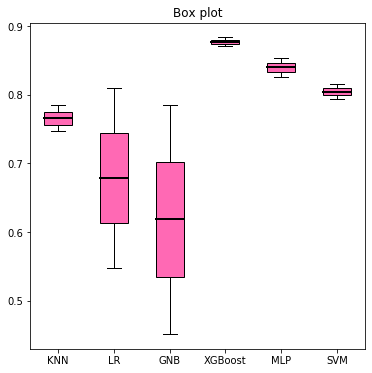

In [17]:
# Import libraries 
import matplotlib.pyplot as plt 
import numpy as np 
  
data1 = [0.7469414, 0.78442728]
data2=[0.54826255, 0.80952381]
data3=[0.45138442,0.78507079]
data4=[0.87065637, 0.88352638]
data5=[0.82561133,0.85392535]
data6=[0.79343629, 0.81595882]

data=[data1, data2, data3, data4, data5, data6] 
fig = plt.figure(figsize =(6, 6)) 
ax = fig.add_subplot(111) 
ax.set_xticklabels(['KNN', 'LR',  'GNB', 'XGBoost', 'MLP', 'SVM', 'Majority', 'Stacking'])
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True) 
colors = ['hotpink', 'hotpink', 'hotpink', 'hotpink', 'hotpink', 'hotpink'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 

for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 


'''
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
# changing color and linewidth of 
# whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
  
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5)
              
'''
plt.title("Box plot") 
  
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
      
# show plot 
plt.savefig('boxinsta.png')
plt.show(bp)